# Decision Tree Regressor:

- Clean the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
geopolymer_df = pd.read_csv("Artificial Intelligence-Based Life Cycle Assessment for Sustainable Geopolymer Concrete - Copy.csv")
geopolymer_df

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Unnamed: 9,Unnamed: 10,Unnamed: 11,FS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days (psi),7 days (psi),28 days (psi),170 degrees for 24 hours (psi),NaN
1,1.0,66.0,19.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,17.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,70.0,15.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,72.0,13.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56.0,59.0,13.0,13.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,57.0,58.0,13.5,13.5,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,58.0,57.0,14.0,14.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,59.0,56.0,14.5,14.5,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
geopolymer_df = geopolymer_df.rename(columns={'Unnamed: 9': 'Comprehensive Strength 7 days(psi)', 'Unnamed: 10': 'Comprehensive Strength 28 days(psi)', 'Unnamed: 11': '170 degrees for 24 hours(psi)'})
geopolymer_df

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days (psi),7 days (psi),28 days (psi),170 degrees for 24 hours (psi),NaN
1,1.0,66.0,19.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,17.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,70.0,15.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,72.0,13.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56.0,59.0,13.0,13.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,57.0,58.0,13.5,13.5,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,58.0,57.0,14.0,14.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,59.0,56.0,14.5,14.5,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
geopolymer_df.drop(geopolymer_df.index[0], inplace=True) 
geopolymer_df

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
1,1.0,66.0,19.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,17.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,70.0,15.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,72.0,13.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,74.0,11.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,76.0,9.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,78.0,7.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,80.0,5.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,82.0,3.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10.0,84.0,1.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
geopolymer_df.head()

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
1,1.0,66.0,19.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,17.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,70.0,15.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,72.0,13.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,74.0,11.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Input Values

In [6]:
geopolymer_df.head()

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
1,1.0,66.0,19.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,17.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,70.0,15.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,72.0,13.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,74.0,11.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
mask_ist = geopolymer_df['IST(min)'].isna()
geopolymer_df.loc[mask_ist, 'IST(min)'] = np.random.uniform(low=30, high=80, size=mask_ist.sum())
geopolymer_df['IST(min)'] = geopolymer_df['IST(min)'].astype(int)

mask_fst = geopolymer_df['FST(min)'].isna()
geopolymer_df.loc[mask_fst, 'FST(min)'] = np.random.uniform(low=30, high=80, size=mask_fst.sum())
geopolymer_df['FST(min)'] = geopolymer_df['FST(min)'].astype(int)

mask_low_cs = geopolymer_df['Comprehensive Strength'].isna()
geopolymer_df.loc[mask_low_cs, 'Comprehensive Strength'] = np.random.uniform(low=10, high=20, size=mask_low_cs.sum())
geopolymer_df['Comprehensive Strength'] = geopolymer_df['Comprehensive Strength'].astype(int)

mask_medium_cs = geopolymer_df['Comprehensive Strength 7 days(psi)'].isna()
geopolymer_df.loc[mask_medium_cs, 'Comprehensive Strength 7 days(psi)'] = np.random.uniform(low=15, high=35, size=mask_medium_cs.sum())
geopolymer_df['Comprehensive Strength 7 days(psi)'] = geopolymer_df['Comprehensive Strength 7 days(psi)'].astype(int)

mask_high_cs = geopolymer_df['Comprehensive Strength 28 days(psi)'].isna()
geopolymer_df.loc[mask_high_cs, 'Comprehensive Strength 28 days(psi)'] = np.random.uniform(low=45, high=80, size=mask_high_cs.sum())
geopolymer_df['Comprehensive Strength 28 days(psi)'] = geopolymer_df['Comprehensive Strength 28 days(psi)'].astype(int)

mask_170_degrees = geopolymer_df['170 degrees for 24 hours(psi)'].isna()
geopolymer_df.loc[mask_170_degrees, '170 degrees for 24 hours(psi)'] = np.random.uniform(low=25, high=40, size=mask_170_degrees.sum())
geopolymer_df['170 degrees for 24 hours(psi)'] = geopolymer_df['170 degrees for 24 hours(psi)'].astype(int)

mask_fs = geopolymer_df['FS'].isna()
geopolymer_df.loc[mask_fs, 'FS'] = np.random.uniform(low=15, high=35, size=mask_fs.sum())
geopolymer_df['FS'] = geopolymer_df['FS'].astype(int)

geopolymer_df.head()

C:\Users\sydne\AppData\Local\Temp\ipykernel_89624\3616810849.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  geopolymer_df.loc[mask_low_cs, 'Comprehensive Strength'] = np.random.uniform(low=10, high=20, size=mask_low_cs.sum())
C:\Users\sydne\AppData\Local\Temp\ipykernel_89624\3616810849.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  geopolymer_df.loc[mask_medium_cs, 'Comprehensive Strength 7 days(psi)'] = np.random.uniform(low=15, high=35, size=mask_medium_cs.sum())
C:\Users\sydne\AppData\Local\Temp\ipykernel_89624\3616810849.py:

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
1,1.0,66.0,19.0,0.0,7.5,7.5,75,74,13,19,72,28,17
2,2.0,68.0,17.0,0.0,7.5,7.5,58,30,17,24,59,31,21
3,3.0,70.0,15.0,0.0,7.5,7.5,53,62,13,29,75,34,20
4,4.0,72.0,13.0,0.0,7.5,7.5,43,51,10,30,68,34,23
5,5.0,74.0,11.0,0.0,7.5,7.5,44,36,11,29,59,34,23


In [8]:
# summary of statistics
geopolymer_df.describe()

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
count,60.000000,60.000000,60.000000,60.000000,60.0,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000
mean,30.500000,67.250000,8.875000,8.875000,7.5,7.5,52.083333,53.583333,14.800000,24.100000,60.366667,31.816667,24.9500
std,17.464249,9.058426,9.358955,9.358955,0.0,0.0,13.362345,15.259664,2.874788,6.063785,9.856542,4.073443,5.8929
min,1.000000,55.000000,0.000000,0.000000,7.5,7.5,30.000000,30.000000,10.000000,15.000000,45.000000,25.000000,15.0000
25%,15.750000,59.750000,0.000000,0.000000,7.5,7.5,42.750000,39.750000,13.000000,19.000000,51.750000,28.000000,20.0000
50%,30.500000,65.000000,6.750000,6.750000,7.5,7.5,48.500000,54.000000,15.000000,23.000000,59.000000,32.000000,24.5000
75%,45.250000,74.500000,14.125000,14.125000,7.5,7.5,65.000000,65.250000,18.000000,29.250000,68.000000,35.000000,30.2500
max,60.000000,84.000000,30.000000,30.000000,7.5,7.5,78.000000,79.000000,19.000000,34.000000,79.000000,39.000000,34.0000


# Train and Test the Data:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [10]:
X = geopolymer_df.iloc[:, 6:8]
y = geopolymer_df.iloc[:, 8:12]
y

,Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi)
1,13,19,72,28
2,17,24,59,31
3,13,29,75,34
4,10,30,68,34
5,11,29,59,34
6,15,18,75,31
7,11,20,55,29
8,11,31,71,26
9,10,32,77,32
10,18,31,60,35


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,5,7,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='r2')

grid.fit(X, y)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [12]:
from sklearn.model_selection import GridSearchCV
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model
#dtr = DecisionTreeRegressor(max_depth=2, min_samples_leaf=2, min_samples_split=20, random_state=42)

grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='r2')

param_grid = {
    'max_depth': [3,5,7,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid.fit(X_train, y_train)

dtr = DecisionTreeRegressor(**grid.best_params_, random_state=42)

# train
dtr.fit(X_train, y_train)

# predict 
y_pred = dtr.predict(X_test)

# R2 score
print("R2 Score (overall):", r2_score(y_test, y_pred))

# print("Train R2:", dtr.score(X_train, y_train))
# print("Test R2:", dtr.score(X_test, y_test))

# mean square error
print("MSE: ", mean_squared_error(y_test, y_pred))

R2 Score (overall): -0.23984400865216854
MSE:  65.13483030058428


- MSE = 0 → perfect model

- R² = 1 → perfect model

- R² = 0 → model is useless (same as predicting mean)

- R² < 0 → model is worse than predicting mean

# Outputs Performance:

In [13]:
for i, col in enumerate(y.columns):
    print(col)
    print("MSE:", mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print("R2:", r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Comprehensive Strength
MSE: 10.213409015567011
R2: -0.47812150577050194

Comprehensive Strength 7 days(psi)
MSE: 58.680468388335726
R2: -0.28341243133662597

Comprehensive Strength 28 days(psi)
MSE: 170.29163438251115
R2: -0.30083260044992843

170 degrees for 24 hours(psi)
MSE: 21.353809415923234
R2: 0.10299050294838241



# Visualize Decision Tree:

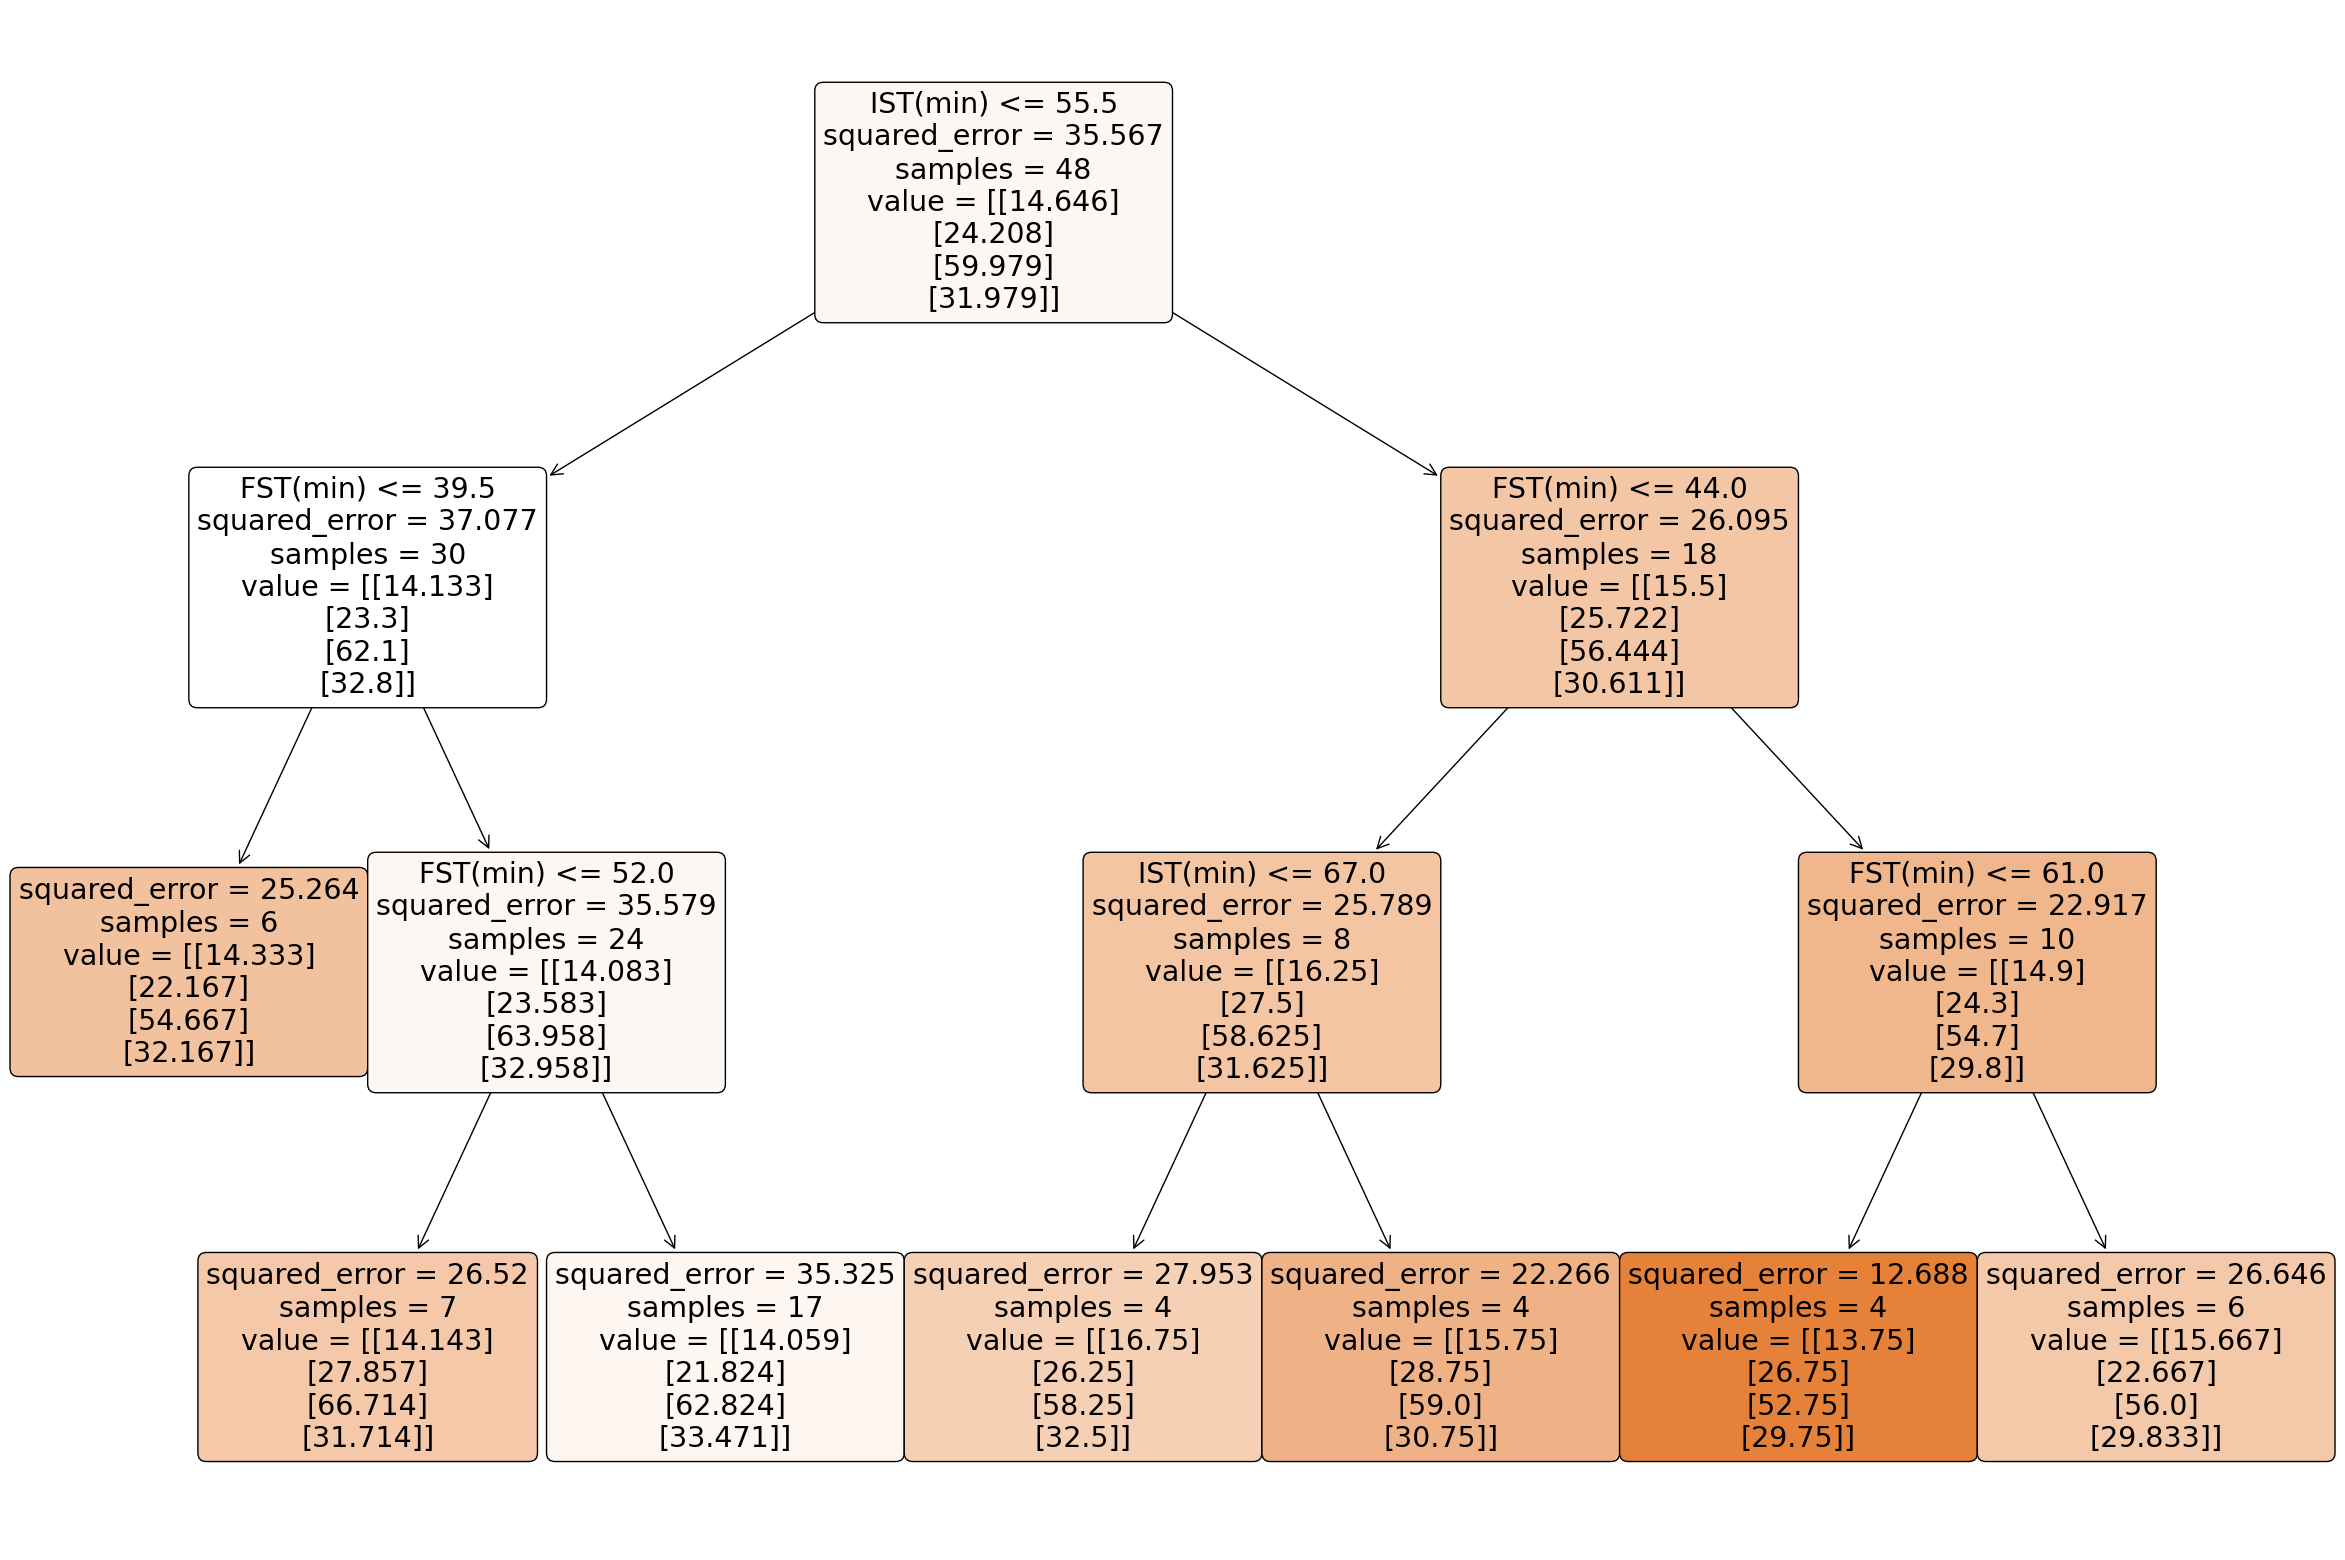

In [14]:
from sklearn.tree import plot_tree

# DTR of Inputs:
plt.figure(figsize=(30, 20))
plot_tree(dtr, feature_names=X.columns, filled=True, rounded=True)
plt.show()

 - Features that appear higher up the tree (root), create the most significant reduction in error (variance reduction).
 - Tree depth: Shallow trees are easire to understand, while deep trees are more complex.
 - Evaluate the decision rule: Baggasse Ash <= 10.25
 - Node info: feature < or >, mean squared error, number of samples, and predicted values.
 - Final Prediction: is the representative average. 

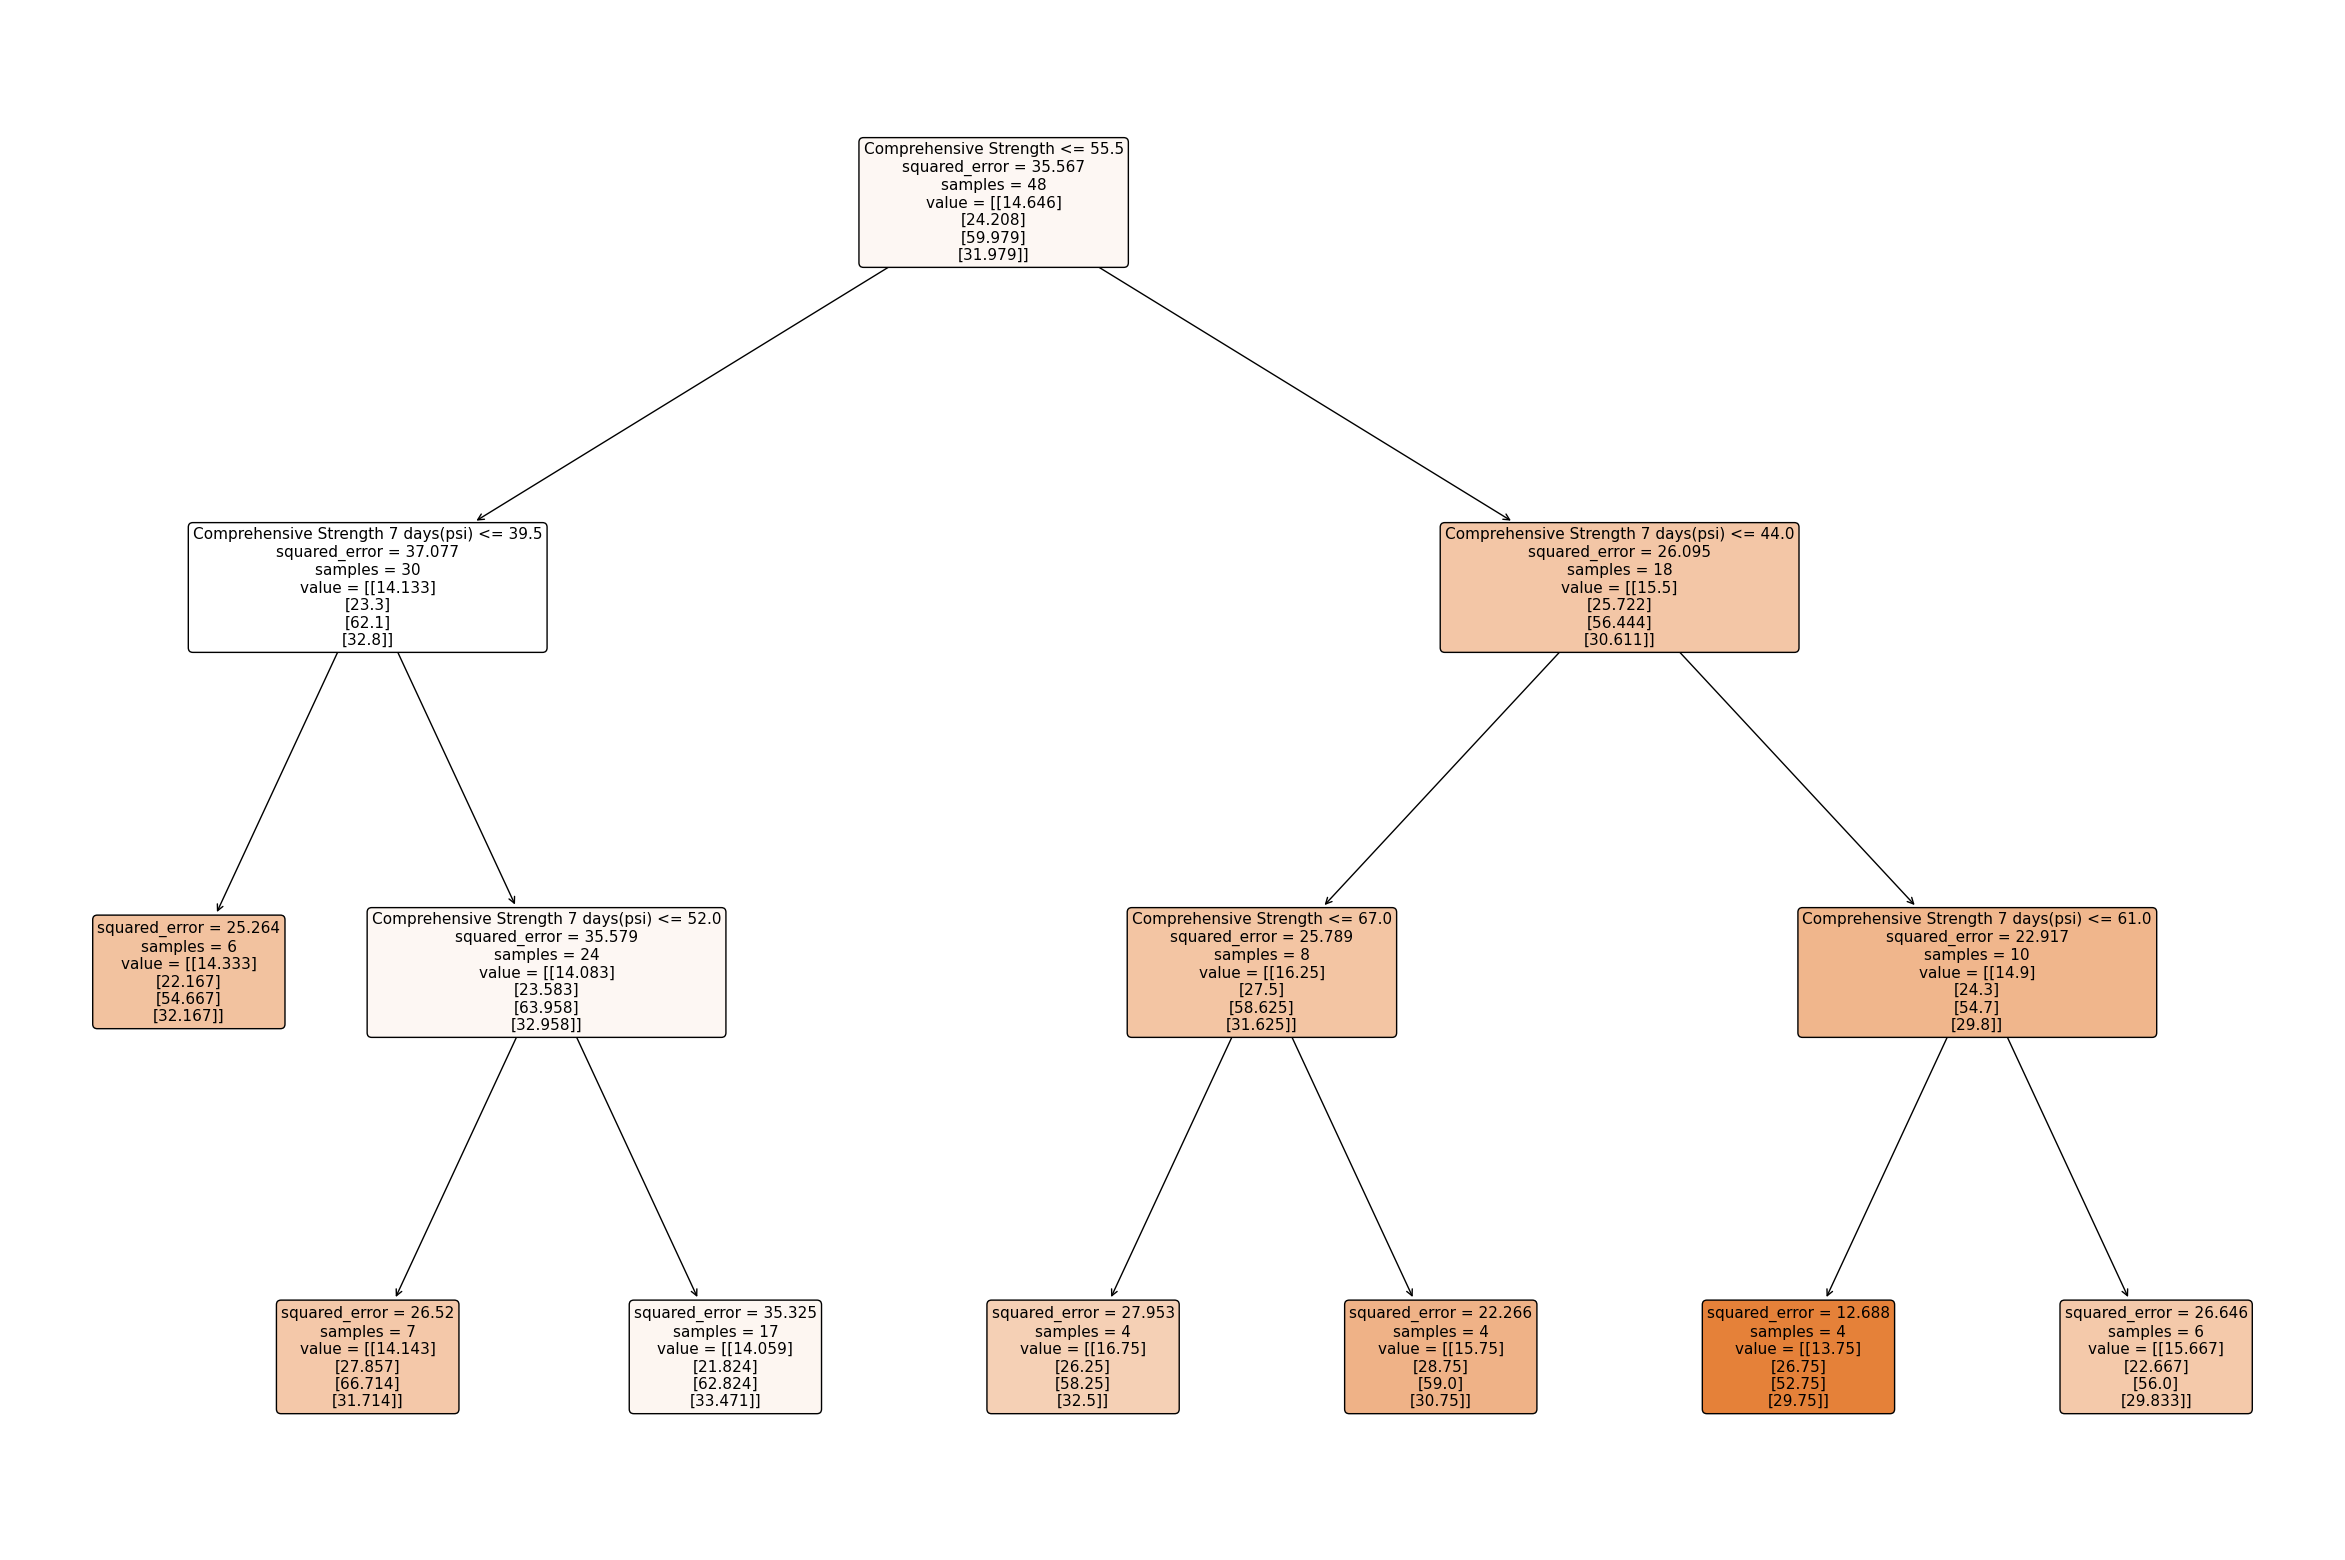

In [15]:
# DTR of Outputs:
plt.figure(figsize=(30, 20))
plot_tree(dtr, feature_names=y.columns, filled=True, rounded=True)
plt.show()

# Improve Model:

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtr, X, y, cv=5)
print("Mean Cross-Validation Score: ", scores.mean())

Mean Cross-Validation Score:  -0.32550195585545694


 - Good Fit --> High --> close to training value, performing well and effectively
 - Overfitting --> High --> Significantly lower, learned training data to well, too much noise, struggles with unseen data.
 - Underfitting --> Low --> Low close to training score, model is too simple.

# Interpretation:

In [17]:
importance_x = pd.Series(dtr.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance_x)

FST(min)    0.63508
IST(min)    0.36492
dtype: float64


In [18]:
# Decision Tree Regression
# plt.figure()
# plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
# plt.plot(X_test, y_pred, color="cornflowerblue", label="max_depth=2", linewidth=2)
# plt.plot(X_test, y_pred, color="yellowgreen", label="max_depth=5", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Decision Tree Regression")
# plt.legend()
# plt.show()

- Decision Tree Regressor is weak model to train/test and predict values.

# Low Comprehensive Strength vs IST Plot:

In [29]:
X_IST = geopolymer_df.iloc[:, 6].values.reshape(-1, 1)
y_CS3 = geopolymer_df.iloc[:, 8].values

X_train_IST, X_test_IST, y_train_IST, y_test_IST = train_test_split(X_IST, y_CS3, test_size=0.2, random_state=42)

In [30]:
regr_1 = DecisionTreeRegressor(max_depth=3, random_state=42)
regr_1.fit(X_train_IST, y_train_IST)

regr_2 = DecisionTreeRegressor(max_depth=5, random_state=42)
regr_2.fit(X_train_IST, y_train_IST)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [31]:
X_range = np.linspace(X_IST.min(), X_IST.max(), 500).reshape(-1, 1)

y_1 = regr_1.predict(X_range)
y_2 = regr_2.predict(X_range)

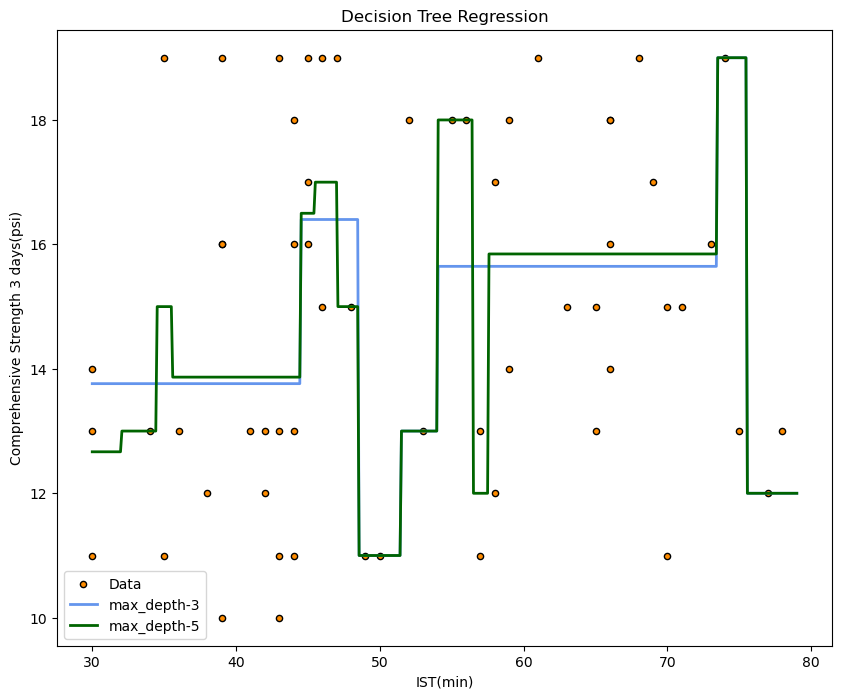

In [42]:
plt.figure(figsize=(10, 8))

plt.scatter(X_IST, y_CS3, s=20, edgecolor="black", c="darkorange", label="Data")

plt.plot(X_range, y_1, color="cornflowerblue", label="max_depth-3", linewidth=2)
plt.plot(X_range, y_2, color="darkgreen", label="max_depth-5", linewidth=2)


plt.xlabel(X.columns[0])
plt.ylabel("Comprehensive Strength 3 days(psi)")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Low Comprehensive Strength vs FST Plot:

In [43]:
X_FST = geopolymer_df.iloc[:, 7].values.reshape(-1, 1)
y_CS3 = geopolymer_df.iloc[:, 8].values

X_train_FST, X_test_FST, y_train_FST, y_test_FST = train_test_split(X_FST, y_CS3, test_size=0.2, random_state=42)


In [44]:
regr_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
regr_3.fit(X_train_FST, y_train_FST)

regr_4 = DecisionTreeRegressor(max_depth=5, random_state=42)
regr_4.fit(X_train_FST, y_train_FST)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [49]:
X_range_FST = np.linspace(X_FST.min(), X_FST.max(), 500).reshape(-1, 1)

y_3 = regr_3.predict(X_range)
y_4 = regr_4.predict(X_range)

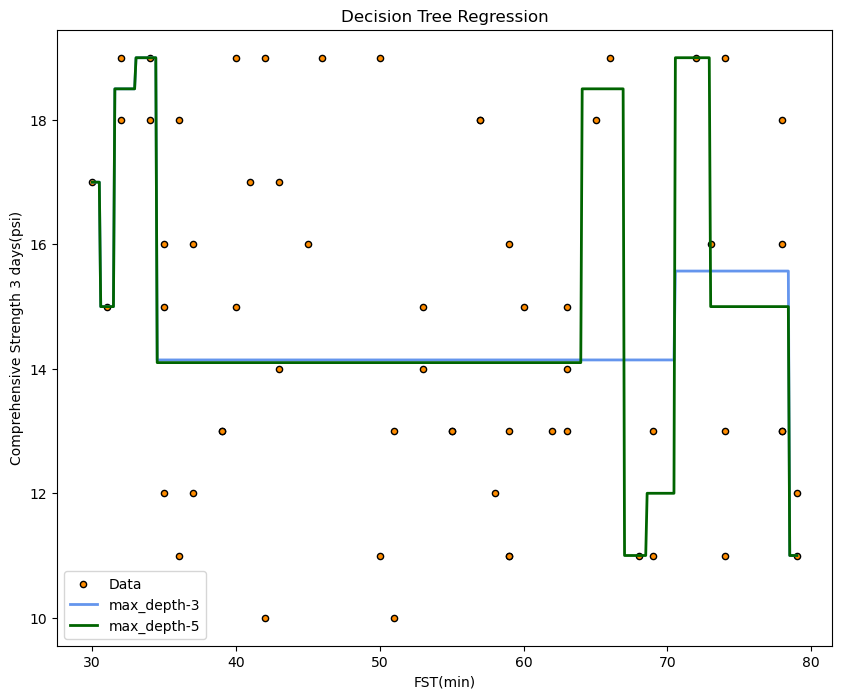

In [50]:
plt.figure(figsize=(10, 8))

plt.scatter(X_FST, y_CS3, s=20, edgecolor="black", c="darkorange", label="Data")

plt.plot(X_range, y_3, color="cornflowerblue", label="max_depth-3", linewidth=2)
plt.plot(X_range, y_4, color="darkgreen", label="max_depth-5", linewidth=2)


plt.xlabel(X.columns[1])
plt.ylabel("Comprehensive Strength 3 days(psi)")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Medium Comprehensive Strength vs IST Plot:

In [51]:
X_IST = geopolymer_df.iloc[:, 6].values.reshape(-1, 1)
y_CS7 = geopolymer_df.iloc[:, 9].values

X_train_IST, X_test_IST, y_train_IST, y_test_IST = train_test_split(X_IST, y_CS7, test_size=0.2, random_state=42)


In [52]:
regr_5 = DecisionTreeRegressor(max_depth=3, random_state=42)
regr_5.fit(X_train_IST, y_train_IST)

regr_6 = DecisionTreeRegressor(max_depth=5, random_state=42)
regr_6.fit(X_train_IST, y_train_IST)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [58]:
y_5 = regr_5.predict(X_range)
y_6 = regr_6.predict(X_range)

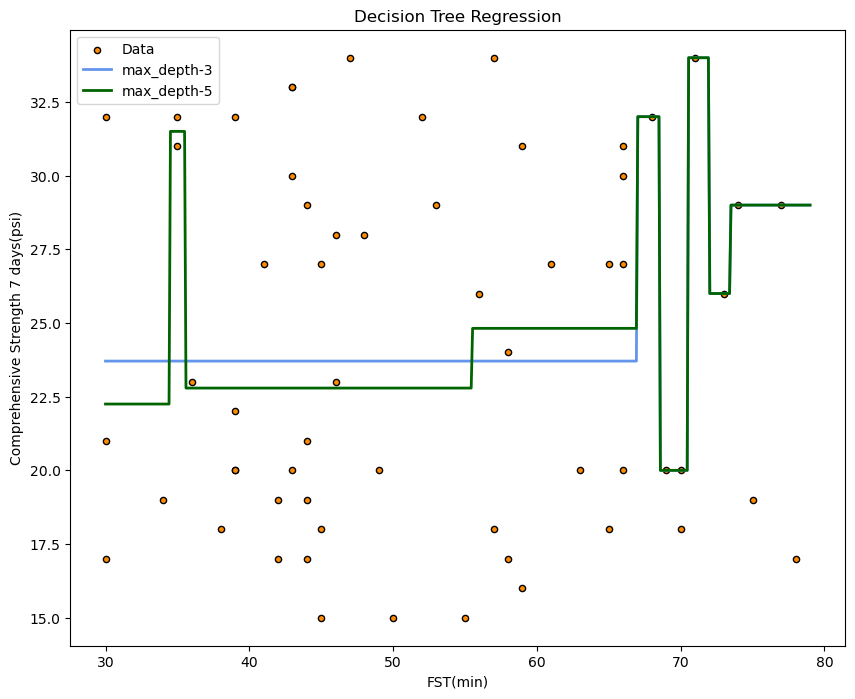

In [59]:
plt.figure(figsize=(10, 8))

plt.scatter(X_IST, y_CS7, s=20, edgecolor="black", c="darkorange", label="Data")

plt.plot(X_range, y_5, color="cornflowerblue", label="max_depth-3", linewidth=2)
plt.plot(X_range, y_6, color="darkgreen", label="max_depth-5", linewidth=2)


plt.xlabel(X.columns[1])
plt.ylabel("Comprehensive Strength 7 days(psi)")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

- No Correlation.
-  Data is dispersed.
- Model is over fitting.

# Medium Comprehensive Strength vs FST Plot:

In [60]:
X_train_FST, X_test_FST, y_train_FST, y_test_FST = train_test_split(X_FST, y_CS7, test_size=0.2, random_state=42)


In [61]:
regr_7 = DecisionTreeRegressor(max_depth=3, random_state=42)
regr_7.fit(X_train_FST, y_train_FST)

regr_8 = DecisionTreeRegressor(max_depth=5, random_state=42)
regr_8.fit(X_train_FST, y_train_FST)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [62]:
y_7 = regr_7.predict(X_range)
y_8 = regr_8.predict(X_range)

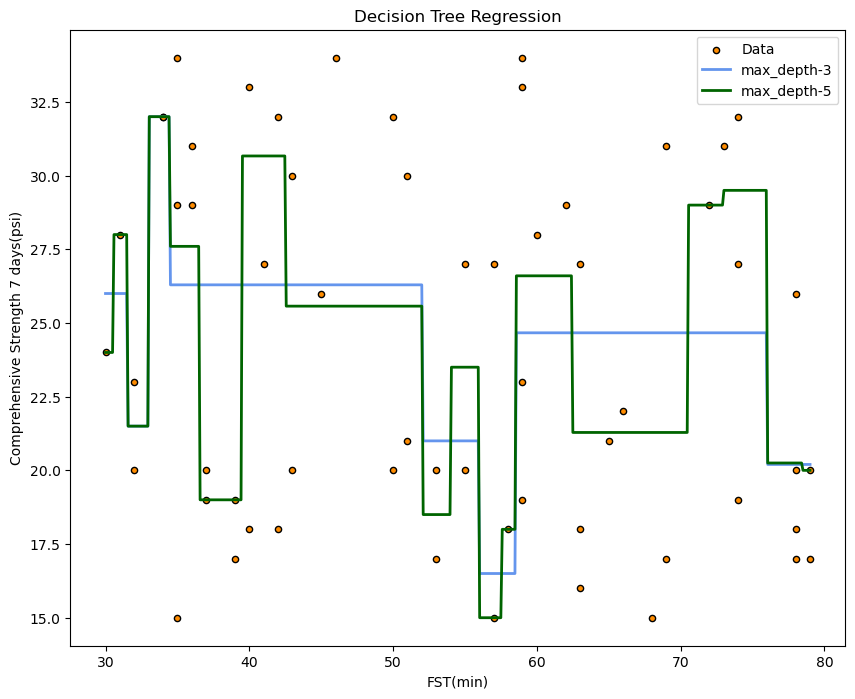

In [63]:
plt.figure(figsize=(10, 8))

plt.scatter(X_FST, y_CS7, s=20, edgecolor="black", c="darkorange", label="Data")

plt.plot(X_range_FST, y_7, color="cornflowerblue", label="max_depth-3", linewidth=2)
plt.plot(X_range_FST, y_8, color="darkgreen", label="max_depth-5", linewidth=2)


plt.xlabel(X.columns[1])
plt.ylabel("Comprehensive Strength 7 days(psi)")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

- Scatter plot is Dispersed.
- No Correlation.
- No overfitting.
- Tree is underfitting the data.

# High Comprehensive Strength vs IST Plot:

In [64]:
y_CS28 = geopolymer_df.iloc[:, 10].values

X_train_IST, X_test_IST, y_train_IST, y_test_IST = train_test_split(X_IST, y_CS28, test_size=0.2, random_state=42)



In [65]:
regr_9 = DecisionTreeRegressor(max_depth=3, random_state=42)
regr_9.fit(X_train_IST, y_train_IST)

regr_10 = DecisionTreeRegressor(max_depth=5, random_state=42)
regr_10.fit(X_train_IST, y_train_IST)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [66]:
y_9 = regr_9.predict(X_range)
y_10 = regr_10.predict(X_range)

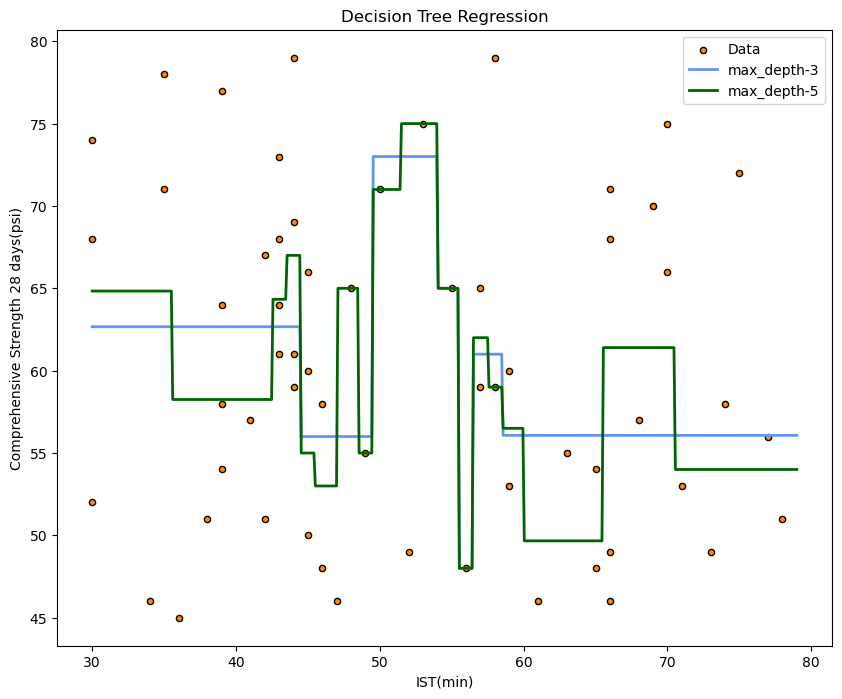

In [71]:
plt.figure(figsize=(10, 8))

plt.scatter(X_IST, y_CS28, s=20, edgecolor="black", c="darkorange", label="Data")

plt.plot(X_range, y_9, color="cornflowerblue", label="max_depth-3", linewidth=2)
plt.plot(X_range, y_10, color="darkgreen", label="max_depth-5", linewidth=2)


plt.xlabel(X.columns[0])
plt.ylabel("Comprehensive Strength 28 days(psi)")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

- Data is dispersed.
- No correlation.
- no underfitting.
- no overfitting.

# High Comprehensive Strength vs FST Plot:

In [68]:
X_train_FST, X_test_FST, y_train_FST, y_test_FST = train_test_split(X_FST, y_CS28, test_size=0.2, random_state=42)


In [69]:
regr_11 = DecisionTreeRegressor(max_depth=3, random_state=42)
regr_11.fit(X_train_FST, y_train_FST)

regr_12 = DecisionTreeRegressor(max_depth=5, random_state=42)
regr_12.fit(X_train_FST, y_train_FST)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [70]:
y_11 = regr_11.predict(X_range_FST)
y_12 = regr_12.predict(X_range_FST)

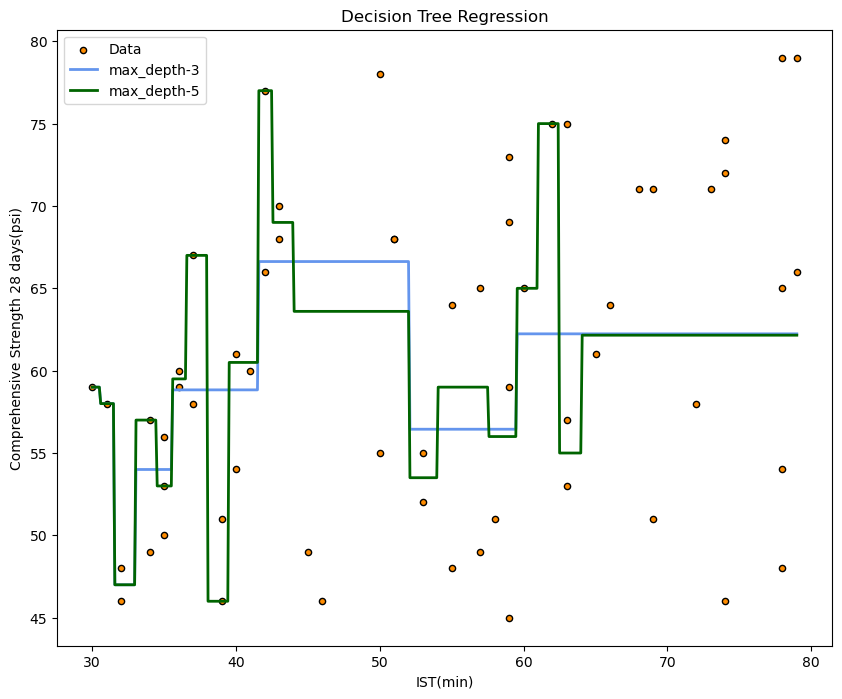

In [72]:
plt.figure(figsize=(10, 8))

plt.scatter(X_FST, y_CS28, s=20, edgecolor="black", c="darkorange", label="Data")

plt.plot(X_range, y_11, color="cornflowerblue", label="max_depth-3", linewidth=2)
plt.plot(X_range, y_12, color="darkgreen", label="max_depth-5", linewidth=2)


plt.xlabel(X.columns[0])
plt.ylabel("Comprehensive Strength 28 days(psi)")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

- Data is dispersed.
- No Correlation.
- little underfitting.
- no overfitting.